<a href="https://colab.research.google.com/github/NguyenTanPhats/Exercies_AI/blob/main/your_future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/your future/Train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/your future/Train'

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 20, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 20, class_mode = 'categorical')

Found 1458 images belonging to 6 classes.
Found 1458 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'Doctor': 0,
 'Engineer': 1,
 'Farmer': 2,
 'Policeman': 3,
 'Singer': 4,
 'Teacher': 5}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_73 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_75 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=64,epochs=35,verbose=1,validation_data=validation_dataset)

Epoch 1/35
73/73 [==============================] - 15s 194ms/step - loss: 1.7845 - accuracy: 0.2929 - val_loss: 1.7377 - val_accuracy: 0.3025
Epoch 2/35
73/73 [==============================] - 15s 211ms/step - loss: 1.7429 - accuracy: 0.3025 - val_loss: 1.7348 - val_accuracy: 0.3025
Epoch 3/35
73/73 [==============================] - 13s 181ms/step - loss: 1.7377 - accuracy: 0.3025 - val_loss: 1.7356 - val_accuracy: 0.3025
Epoch 4/35
73/73 [==============================] - 13s 180ms/step - loss: 1.7375 - accuracy: 0.3025 - val_loss: 1.7347 - val_accuracy: 0.3025
Epoch 5/35
73/73 [==============================] - 13s 176ms/step - loss: 1.7374 - accuracy: 0.3025 - val_loss: 1.7354 - val_accuracy: 0.3025
Epoch 6/35
73/73 [==============================] - 14s 189ms/step - loss: 1.7372 - accuracy: 0.3025 - val_loss: 1.7346 - val_accuracy: 0.3025
Epoch 7/35
73/73 [==============================] - 14s 187ms/step - loss: 1.7373 - accuracy: 0.3025 - val_loss: 1.7347 - val_accuracy: 0.3025

In [ ]:
model.save('/content/drive/MyDrive/your future/model_your_future.h5')

In [ ]:
classificationFood_model = load_model('/content/drive/MyDrive/your future/model_your_future.h5')

In [ ]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

73/73 [==============================] - 4s 46ms/step - loss: 1.7220 - accuracy: 0.2942
Test loss =  1.7219949960708618
Test accuracy =  0.2942386865615845


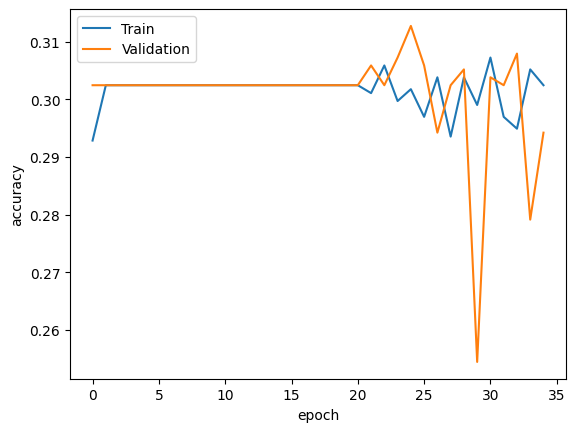

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 106ms/step
Predict is:  Farmer


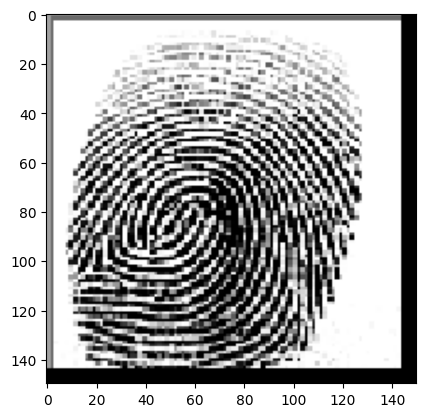

In [ ]:
img = load_img('/content/drive/MyDrive/your future/Test/262__M_Left_little_finger.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Doctor',
 'Engineer',
 'Farmer',
 'Policeman',
 'Singer',
 'Teacher']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])